# Pemisahan katalog berdasarkan sumber gempa

Jalankan file ini di Openquake yang sudah diinstal di komputer masing-masing.

atau:

Jalankan file ini di jupyter dengan cara mengubah kernel ke `openquake`. Jika kernel `openquake` belum ada, lakukan langkah-langkah berikut ini:

Openquake dapat diunduh di sini:
https://downloads.openquake.org/pkgs/windows/oq-engine/OpenQuake_Engine_3.11.5-1.exe

Install beberapa tambahan packages di openquake:

(Asumsi lokasi instalasi openquake di sini: `C:\Program Files\Openquake Engine\python3.6\`, 
jika tidak maka ubah lokasi tersebut sesuai dengan komputer masing-masing)

1. Buka Command Prompt
2. Install `jupyter`: `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m pip install jupyter`
3. Daftarkan ke dalam kernel (opsional): `"C:\Program Files\Openquake Engine\python3.6\python.exe" -m ipykernel install --name "openquake" --display-name "openquake"`


Untuk uji coba, jalankan salah satu baris di bawah ini:

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter.exe" notebook`

atau

`"C:\Program Files\Openquake Engine\python3.6\Scripts\jupyter-notebook.exe"`

## 1. Import packages

Hal ini memastikan apakah python yang digunakan sudah menyediakan packages yang dibutuhkan.

In [1]:
from custom_openquake import *
import warnings
warnings.filterwarnings('ignore')

# folder penyimpanan
dir_figs = os.path.join(os.getcwd(), 'figs')
os.makedirs(dir_figs, exist_ok=True)

## 3. Katalog gempa (declustered)

In [2]:
# membuka data pkl
catalogue_declustered = open_pkl('./test/tmp_OQ002_catalogue_declustered.pkl')

## 4. Patahan

### 4.1 Memisahkan katalog berdasarkan area patahan

In [3]:
# membuka data pkl
fault_geoms = open_pkl('./test/tmp_OQ003_fault_geoms.pkl')
dict_faults = open_pkl('./test/dict_faults.pkl')

# print(fault_geoms["merged"][0][0])

# membuat area dari patahan
area_faults, area_faults_geoms = create_area_faults(fault_geoms, distance=20)

# memisahkan katalog berdasarkan area patahan
catalogue_area_faults = create_catalogue_from_area_faults(catalogue_declustered, area_faults, 
                                                          dict_faults=dict_faults)

# menyimpan data katalog (cek dengan nama file "dict_catalogue_fault_xxx.pkl")
catalogue_to_pkl(catalogue_area_faults, dict_faults=dict_faults, type_of="fault")

# simpan variabel untuk dipakai di tahapan berikutnya
variable_to_pkl(catalogue_area_faults, "./test/tmp_OQ004_catalogue_area_faults.pkl")
variable_to_pkl(area_faults_geoms, "./test/tmp_OQ004_area_faults_geoms.pkl")

### 4.2 Menampilkan distribusi katalog

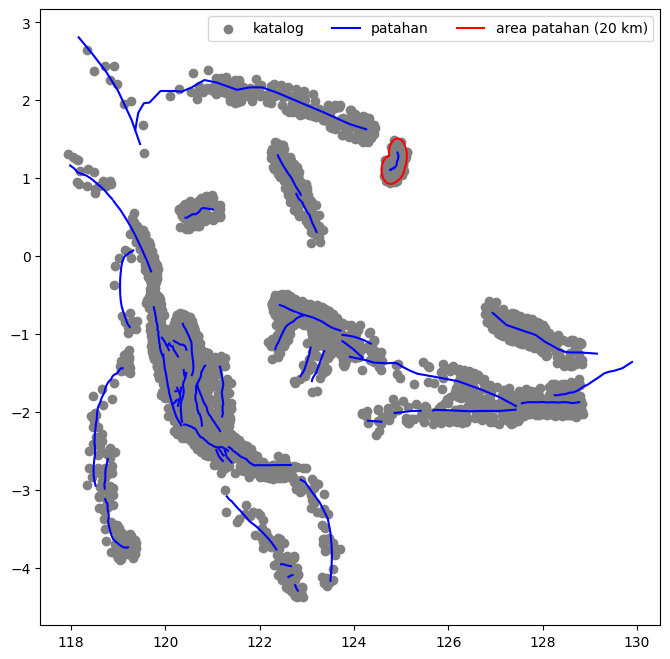

In [4]:
# melihat distribusi data pada gambar

list_variables = (
    catalogue_area_faults,
    fault_geoms,
    area_faults["individual"][2]
)
list_colors = (
    ['grey','none'],
    ['b','none'],
    ['r','none']
)
list_labels = (
    "katalog",
    "patahan",
    "area patahan (20 km)"
)

fig, _ = quick_create_maps(list_variables, list_colors, list_labels, figsize=(8,8))

In [5]:
area_faults

{'merged': [<openquake.hazardlib.geo.polygon.Polygon at 0x1261c8400>,
 'individual': [<openquake.hazardlib.geo.polygon.Polygon at 0x1261c8fd0>,
  <openquake.hazardlib.geo.polygon.Polygon at 0x1261fa1f0>]}